<a href="https://colab.research.google.com/github/ParthGadekar0631/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
###CS 513-A Knowledge Discovery and Data Mining
###Group Final Project - 10
###Group Members: Parth Gadekar, Ankit Dhandharia, Priti Nagdive, Jeel Patel


## Data Preparation

### Importing all the libraries necessary for the project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    precision_recall_curve, auc, average_precision_score
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df['Class'].value_counts(normalize=True) * 100

,proportion
Class,
0,99.827251
1,0.172749


### Visualizing the distribution

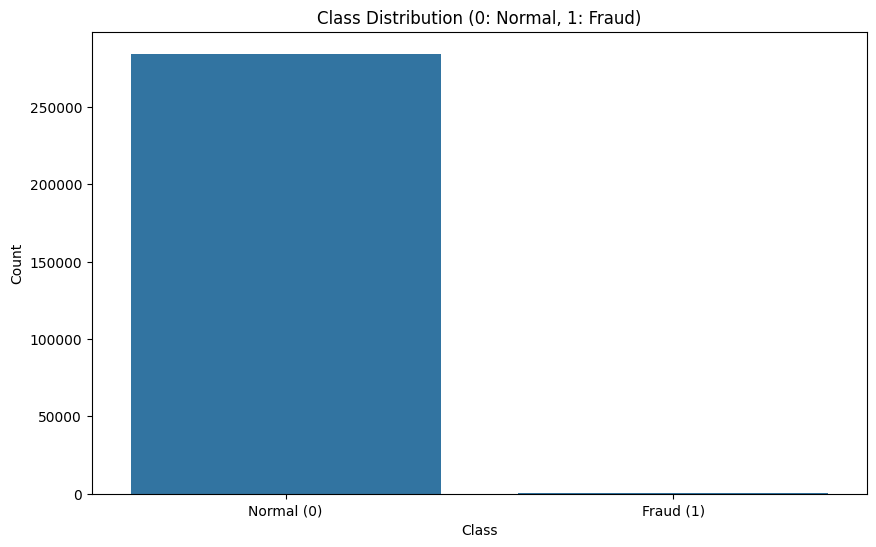

In [ ]:
# Visualizing the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.show()

### Visualizing the amount distributions

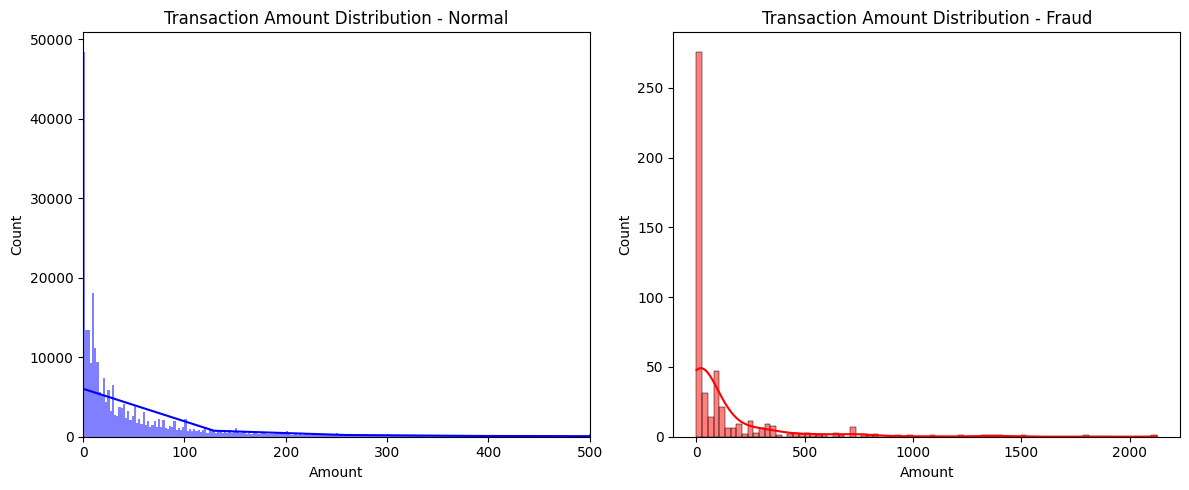

In [ ]:
# Visualizing the amount distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], kde=True, color='blue')
plt.title('Transaction Amount Distribution - Normal')
plt.xlabel('Amount')
plt.xlim([0, 500])  # Limiting x-axis for better visualization

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], kde=True, color='red')
plt.title('Transaction Amount Distribution - Fraud')
plt.xlabel('Amount')
plt.tight_layout()
plt.show()

### Time Distribution of fradulent transactions

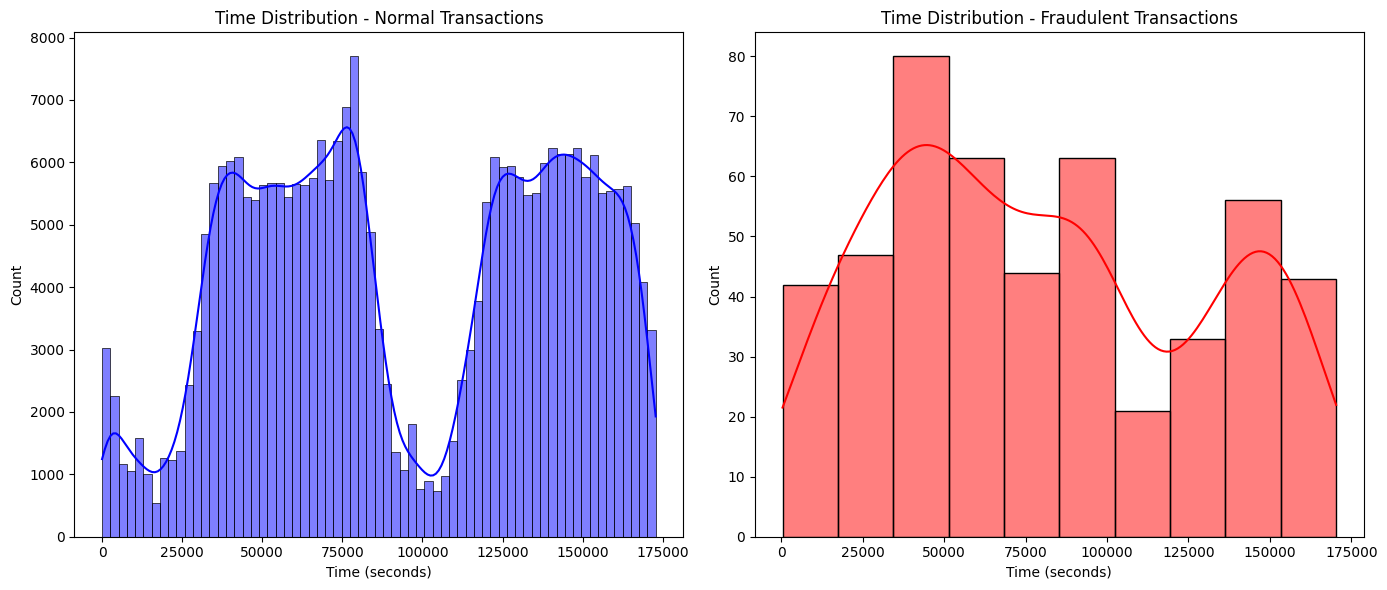

In [ ]:
# Time distribution of fraudulent transactions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Time'], color='blue', kde=True)
plt.title('Time Distribution - Normal Transactions')
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Time'], color='red', kde=True)
plt.title('Time Distribution - Fraudulent Transactions')
plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

### Correlation analysis

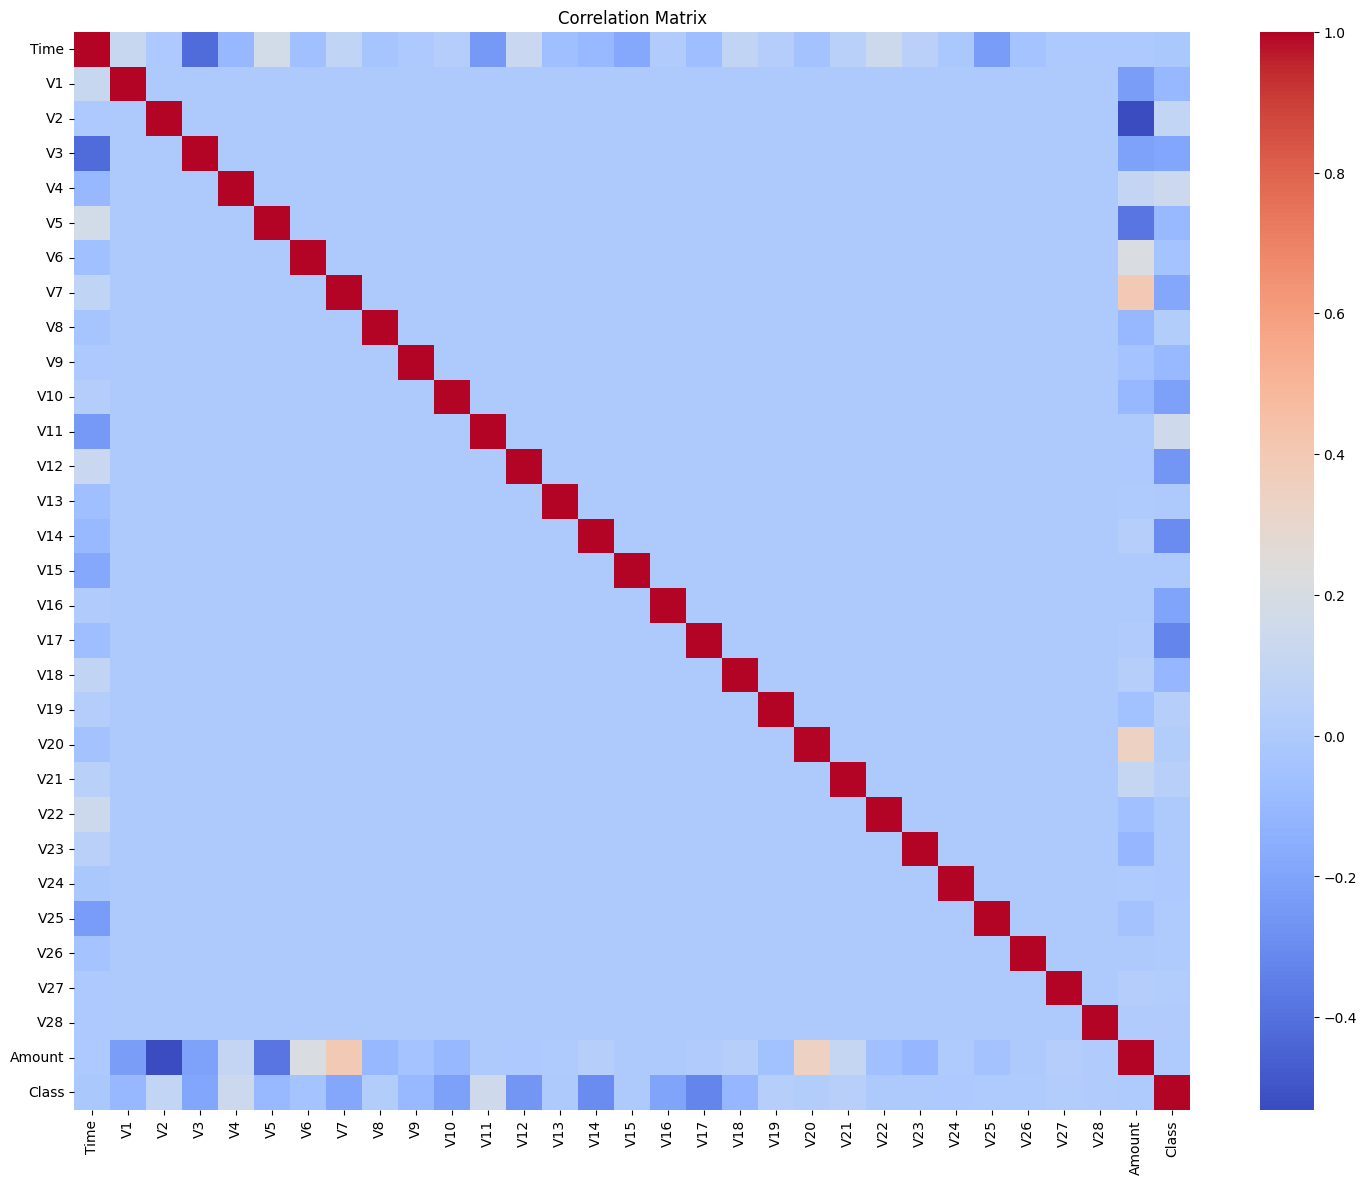

In [ ]:
# Correlation analysis
plt.figure(figsize=(18, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Scaling

In [ ]:
# Feature scaling
# Scaling 'Amount' and 'Time' features
scaler = RobustScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [ ]:
# Dropping the original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)

In [ ]:
# Defining features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
if y.isna().any():
    print(f"Found {y.isna().sum()} NaN values in target variable.")
    # Option 1: Remove rows with NaN in target
    valid_idx = ~y.isna()
    X = X[valid_idx]
    y = y[valid_idx]
    print(f"Removed rows with NaN values. New shapes - X: {X.shape}, y: {y.shape}")

### Data splitting for training and train

In [ ]:
# Splitting into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(Counter(y_train))

Counter({0: 227451, 1: 394})


In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(Counter(y_train_smote))

Counter({0: 227451, 1: 227451})


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
print(Counter(y_train_rus))

Counter({0: 394, 1: 394})


### A Function to evalute and report model performance

In [ ]:
# Function to evaluate and report model performance
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    print(f"\n{model_name} Performance Metrics:")

    # Accuracy, Precision, Recall, F1 Score
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # AUC-ROC
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # Average Precision Score (AP) for Precision-Recall curve
    ap = average_precision_score(y_true, y_pred_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC Score: {roc_auc:.4f}")
    print(f"Average Precision Score: {ap:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.fill_between(recall, precision, alpha=0.2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }

## 1. Logistic Regression with SMOTE


Logistic Regression with SMOTE Performance Metrics:
Accuracy: 0.9747
Precision: 0.0591
Recall: 0.9184
F1 Score: 0.1110
AUC-ROC Score: 0.9712
Average Precision Score: 0.7235

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



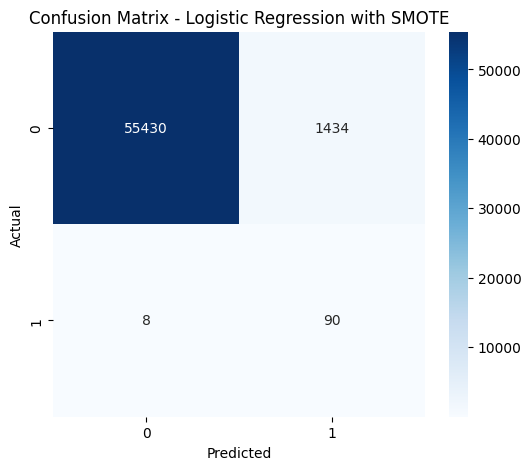

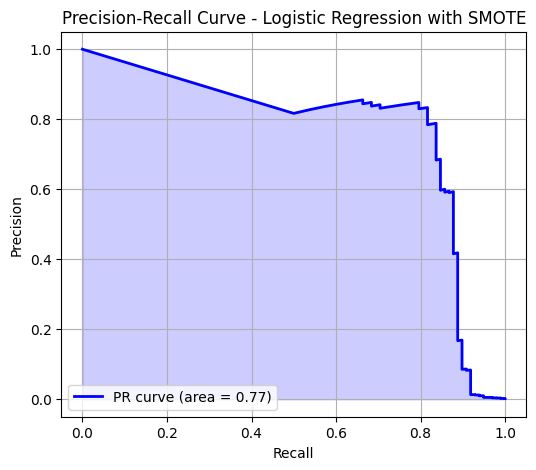

In [ ]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_smote, y_train_smote)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

metrics_log_reg = evaluate_model(y_test, y_pred_log_reg, y_pred_proba_log_reg, "Logistic Regression with SMOTE")


## 2. Random Forest with SMOTE

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]


Random Forest with SMOTE Performance Metrics:
Accuracy: 0.9995
Precision: 0.8791
Recall: 0.8163
F1 Score: 0.8466
AUC-ROC Score: 0.9632
Average Precision Score: 0.8680

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



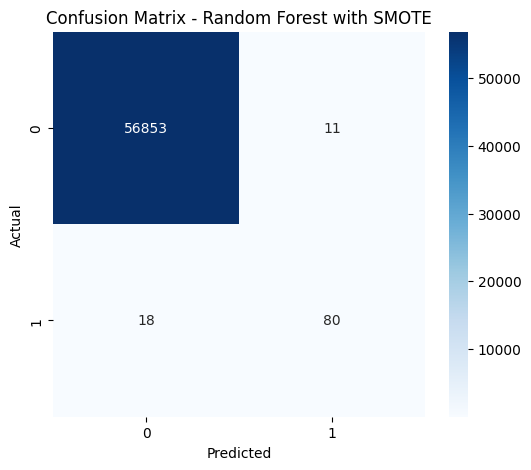

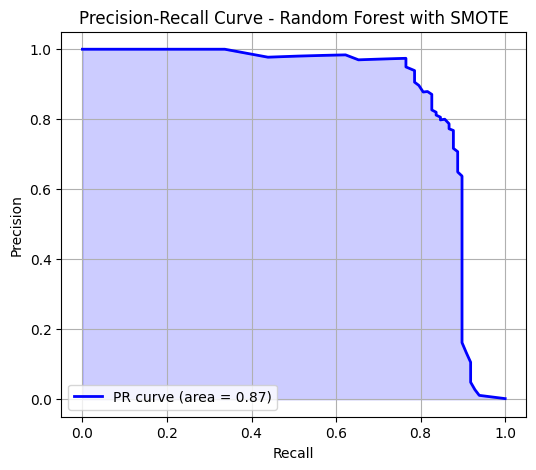

In [ ]:
metrics_rf = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest with SMOTE")

## 3. XGBoost with SMOTE

In [ ]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=500,
                   max_depth=5, subsample=0.8,
                   colsample_bytree=0.8, random_state=42,
                   eval_metrics= 'logloss')  # Handling imbalance
xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]


XGBoost with SMOTE Performance Metrics:
Accuracy: 0.9912
Precision: 0.1525
Recall: 0.8980
F1 Score: 0.2607
AUC-ROC Score: 0.9767
Average Precision Score: 0.8088

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.90      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962



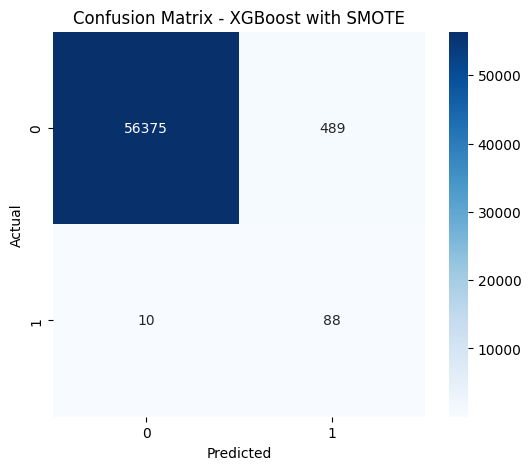

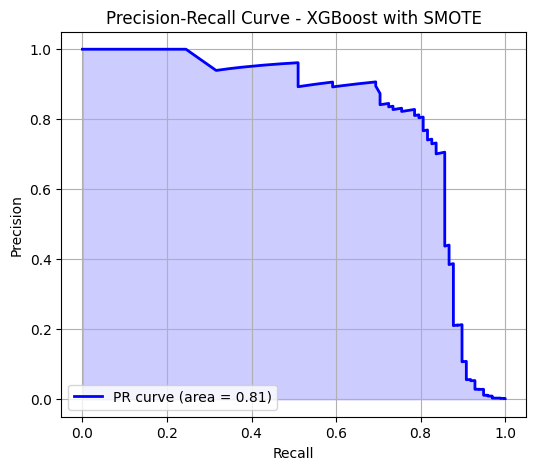

In [ ]:
metrics_xgb = evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost with SMOTE")

## 4. SVM with RandomUnderSampler

In [ ]:
svm = SVC(probability=True, class_weight='balanced', random_state=42)
svm.fit(X_train_rus, y_train_rus)

y_pred_svm = svm.predict(X_test)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]


SVM with RandomUnderSampler Performance Metrics:
Accuracy: 0.9797
Precision: 0.0707
Recall: 0.8878
F1 Score: 0.1309
AUC-ROC Score: 0.9786
Average Precision Score: 0.6174

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.89      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



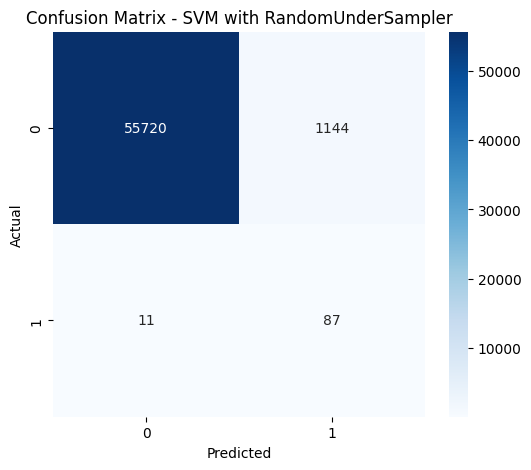

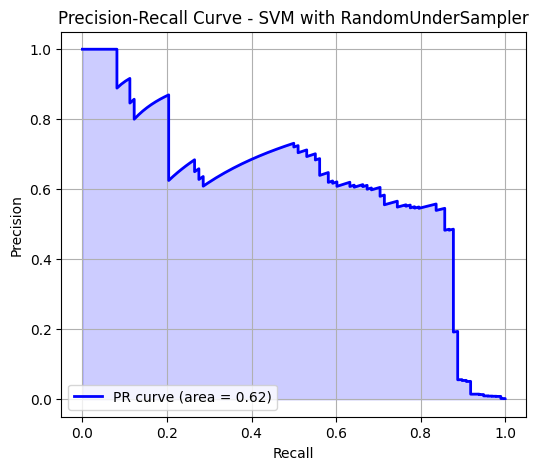

In [ ]:
metrics_svm = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm, "SVM with RandomUnderSampler")

## 5. Gradient Boosting with SMOTE

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_smote, y_train_smote)

y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]


Gradient Boosting with SMOTE Performance Metrics:
Accuracy: 0.9870
Precision: 0.1085
Recall: 0.9082
F1 Score: 0.1939
AUC-ROC Score: 0.9799
Average Precision Score: 0.7108

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.91      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



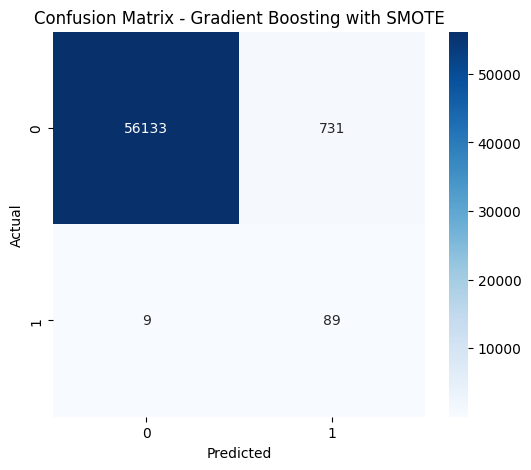

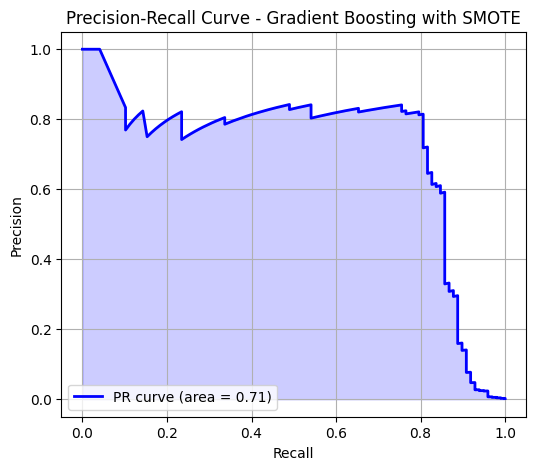

In [ ]:
metrics_gb = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb, "Gradient Boosting with SMOTE")

## 6. AdaBoost with SMOTE

In [ ]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_ada = ada.predict(X_test)
y_pred_proba_ada = ada.predict_proba(X_test)[:, 1]


AdaBoost with SMOTE Performance Metrics:
Accuracy: 0.9808
Precision: 0.0757
Recall: 0.9082
F1 Score: 0.1398
AUC-ROC Score: 0.9747
Average Precision Score: 0.8269

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



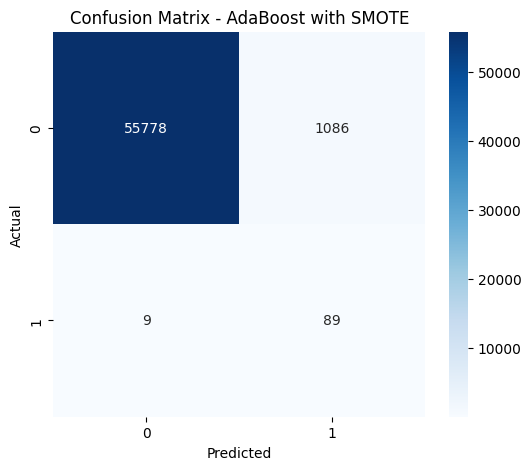

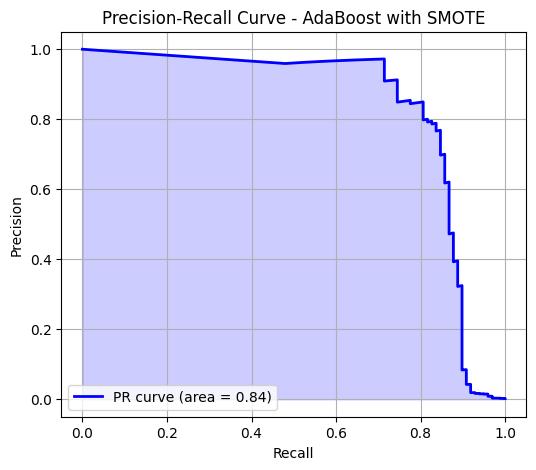

In [ ]:
# Evaluate the model
metrics_ada = evaluate_model(y_test, y_pred_ada, y_pred_proba_ada, "AdaBoost with SMOTE")

## 7. K-Nearest Neighbors with SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train KNN Classifier
# Using a smaller subset of training data for faster runtime
# Adjust sample_size as needed depending on your computational resources
sample_size = 20000  # Adjust this based on your computer's capabilities
np.random.seed(42)
sample_indices = np.random.choice(len(X_train_smote), min(sample_size, len(X_train_smote)), replace=False)
X_train_knn = X_train_smote.iloc[sample_indices]
y_train_knn = y_train_smote.iloc[sample_indices]

print(f"Using {len(X_train_knn)} samples for KNN training")

Using 20000 samples for KNN training


In [ ]:
# Initialize KNN with speed-optimized parameters
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',  # Weight points by inverse of their distance
    algorithm='kd_tree',  # Use kd_tree for faster lookups
    leaf_size=30,
    n_jobs=-1  # Use all available cores
)
knn.fit(X_train_knn, y_train_knn)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]


KNN with SMOTE Performance Metrics:
Accuracy: 0.9771
Precision: 0.0649
Recall: 0.9184
F1 Score: 0.1213
AUC-ROC Score: 0.9591
Average Precision Score: 0.1786

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



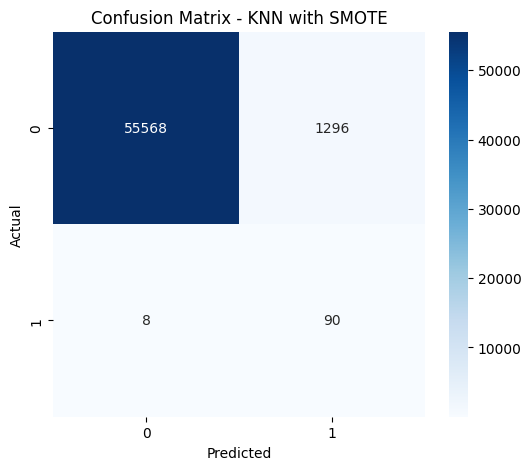

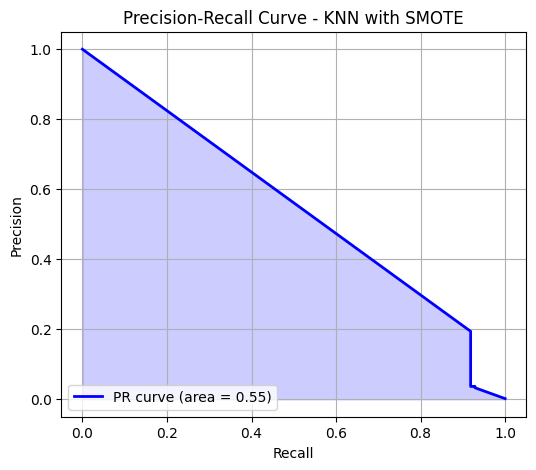

In [ ]:
# Evaluate the model
metrics_knn = evaluate_model(y_test, y_pred_knn, y_pred_proba_knn, "KNN with SMOTE")

## 8. Decision Tree with SMOTE

In [ ]:
# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(
    max_depth=10,           # Limiting depth to prevent overfitting
    min_samples_split=5,    # Minimum samples required to split
    min_samples_leaf=2,     # Minimum samples required at a leaf node
    class_weight='balanced', # Handle class imbalance
    random_state=42
)
dt.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]


Decision Tree with SMOTE Performance Metrics:
Accuracy: 0.9810
Precision: 0.0705
Recall: 0.8265
F1 Score: 0.1299
AUC-ROC Score: 0.8704
Average Precision Score: 0.4408

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.83      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.90      0.56     56962
weighted avg       1.00      0.98      0.99     56962



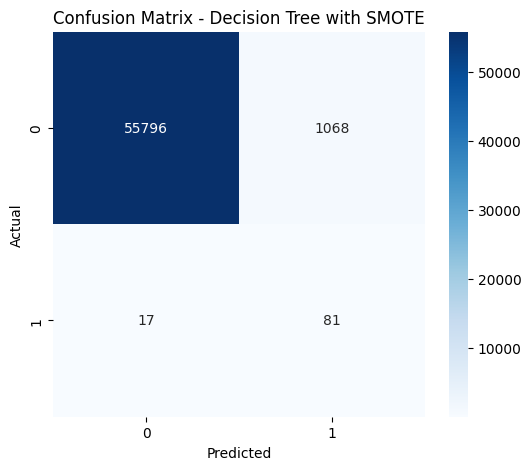

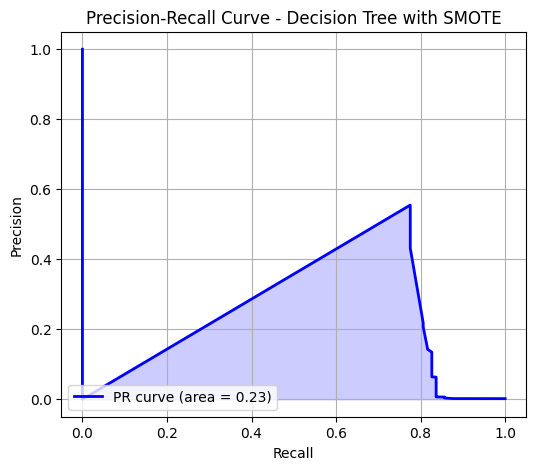

In [ ]:
# Evaluate the model
metrics_dt = evaluate_model(y_test, y_pred_dt, y_pred_proba_dt, "Decision Tree with SMOTE")

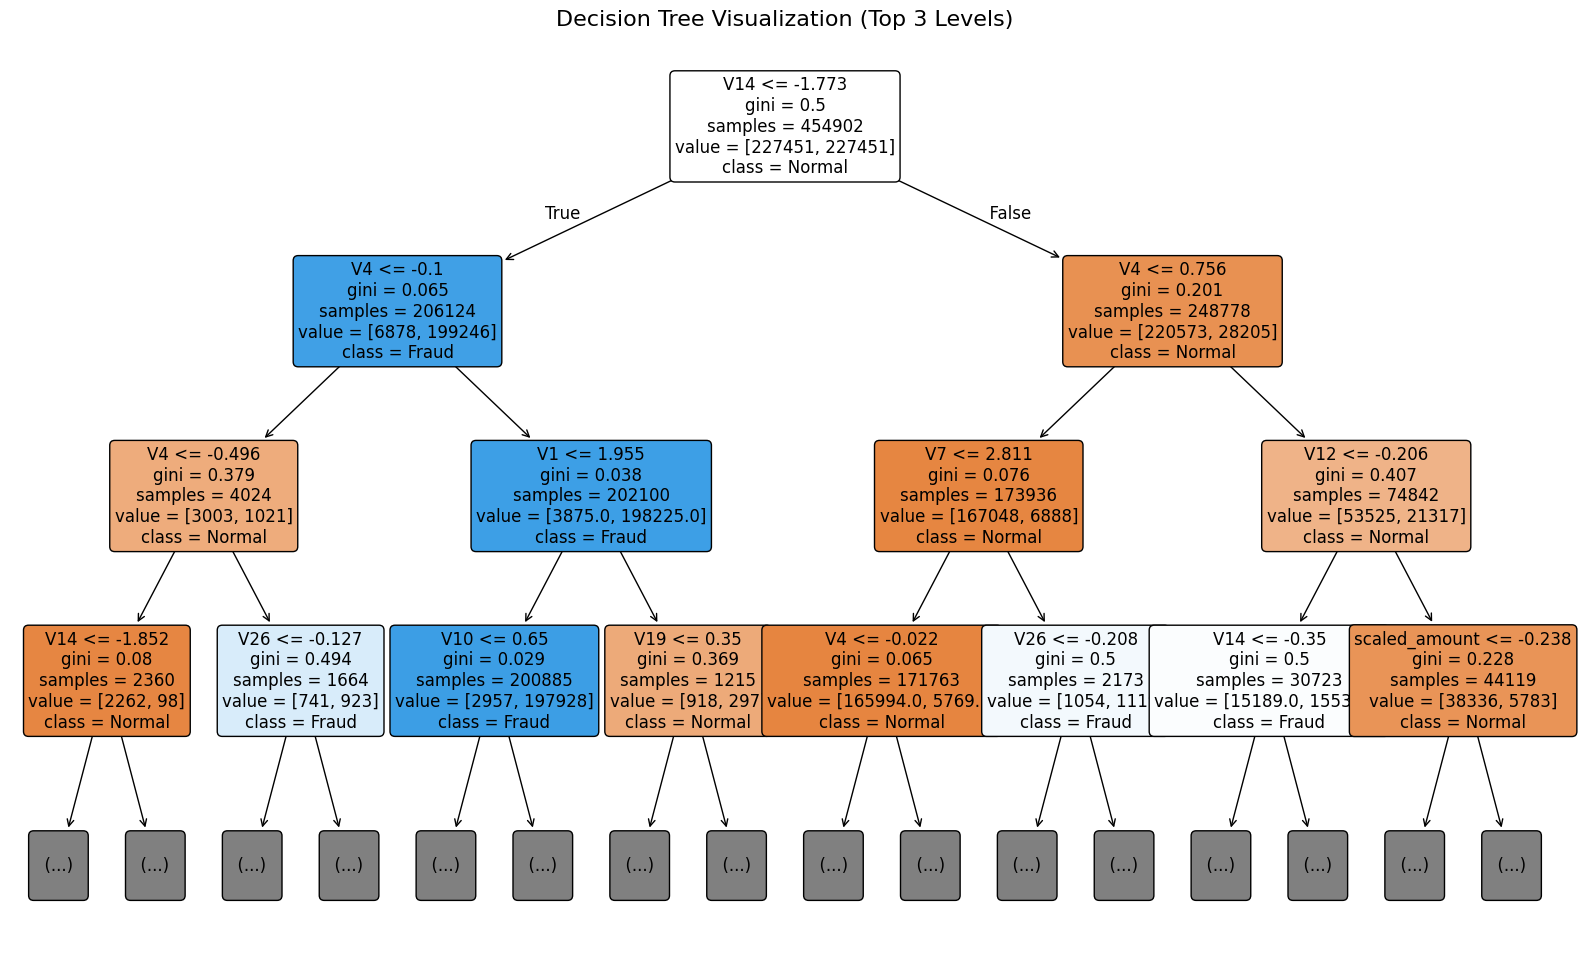

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))  # Bigger figure for clarity

# Plot only up to depth=3
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Normal', 'Fraud'],
    filled=True,
    rounded=True,
    proportion=False,    # set to False for normal split display
    max_depth=3,         # actually limit visualization to first 3 levels
    fontsize=12          # bigger font size
)

plt.title('Decision Tree Visualization (Top 3 Levels)', fontsize=16)
plt.show()


## Model Comparison

In [ ]:
# Compare all models
models = ["Logistic Regression", "Random Forest", "XGBoost", "SVM", "Gradient Boosting", "AdaBoost", "KNN", "Decision Tree"]
metrics_all = [metrics_log_reg, metrics_rf, metrics_xgb, metrics_svm, metrics_gb, metrics_ada, metrics_knn, metrics_dt]

# Model comparison based on different metrics
metrics_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': [m['accuracy'] for m in metrics_all],
    'Precision': [m['precision'] for m in metrics_all],
    'Recall': [m['recall'] for m in metrics_all],
    'F1 Score': [m['f1'] for m in metrics_all],
    'ROC AUC': [m['roc_auc'] for m in metrics_all],
    'PR AUC': [m['pr_auc'] for m in metrics_all]
})

print("\nModel Comparison:")
print(metrics_comparison)


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.974685   0.059055  0.918367  0.110974  0.971219   
1        Random Forest  0.999491   0.879121  0.816327  0.846561  0.963199   
2              XGBoost  0.991240   0.152513  0.897959  0.260741  0.976662   
3                  SVM  0.979723   0.070674  0.887755  0.130926  0.978643   
4    Gradient Boosting  0.987009   0.108537  0.908163  0.193900  0.979940   
5             AdaBoost  0.980777   0.075745  0.908163  0.139827  0.974672   
6                  KNN  0.977108   0.064935  0.918367  0.121294  0.959136   
7        Decision Tree  0.980952   0.070496  0.826531  0.129912  0.870370   

     PR AUC  
0  0.768883  
1  0.870481  
2  0.810532  
3  0.615089  
4  0.714455  
5  0.836365  
6  0.549845  
7  0.229318  


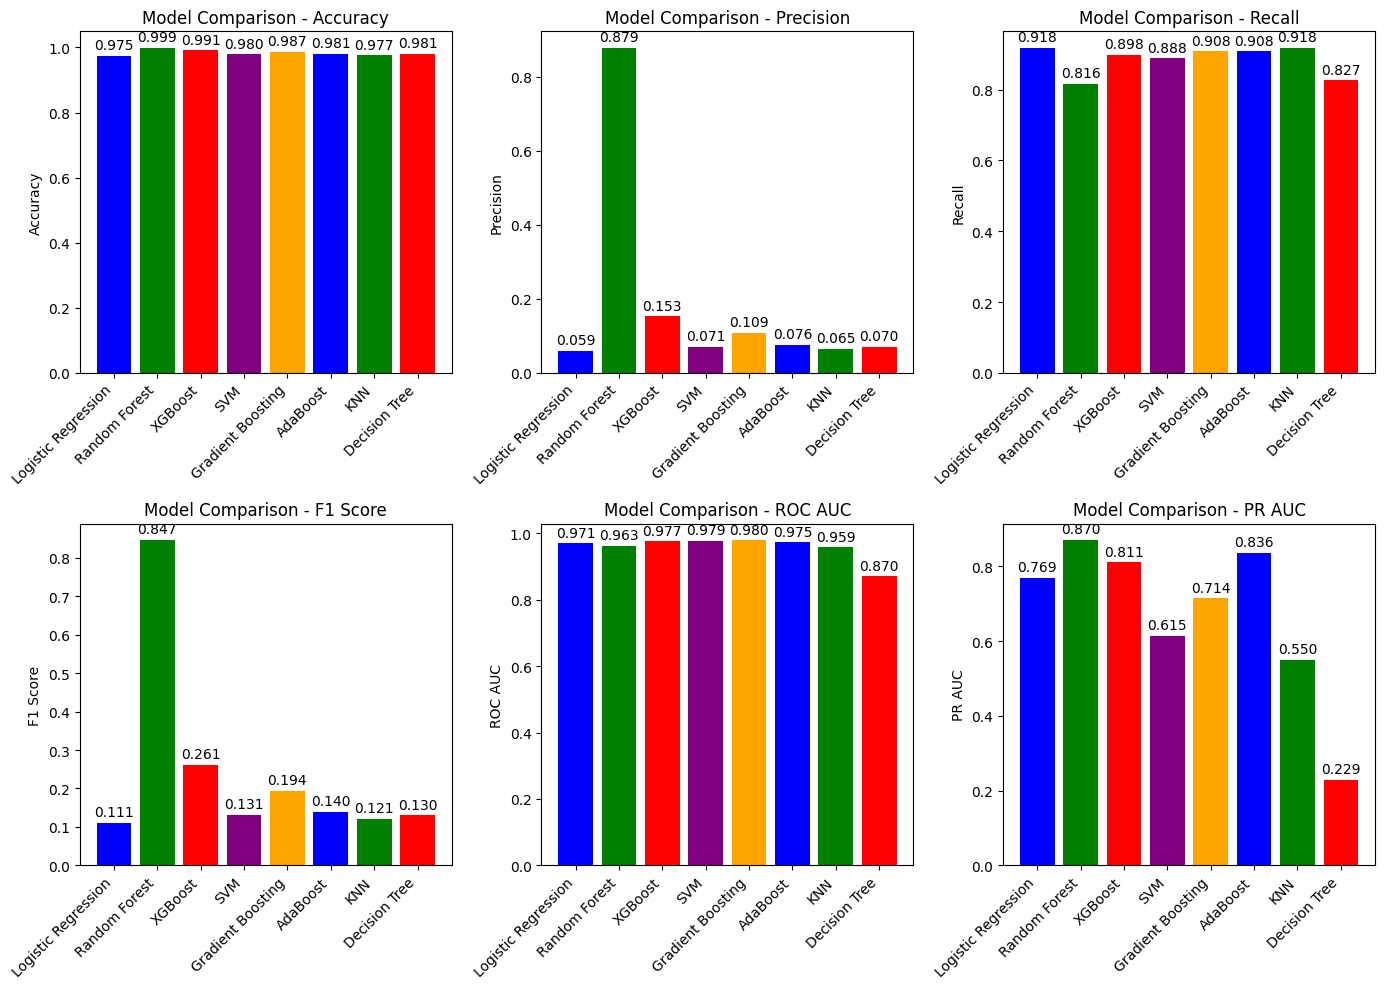

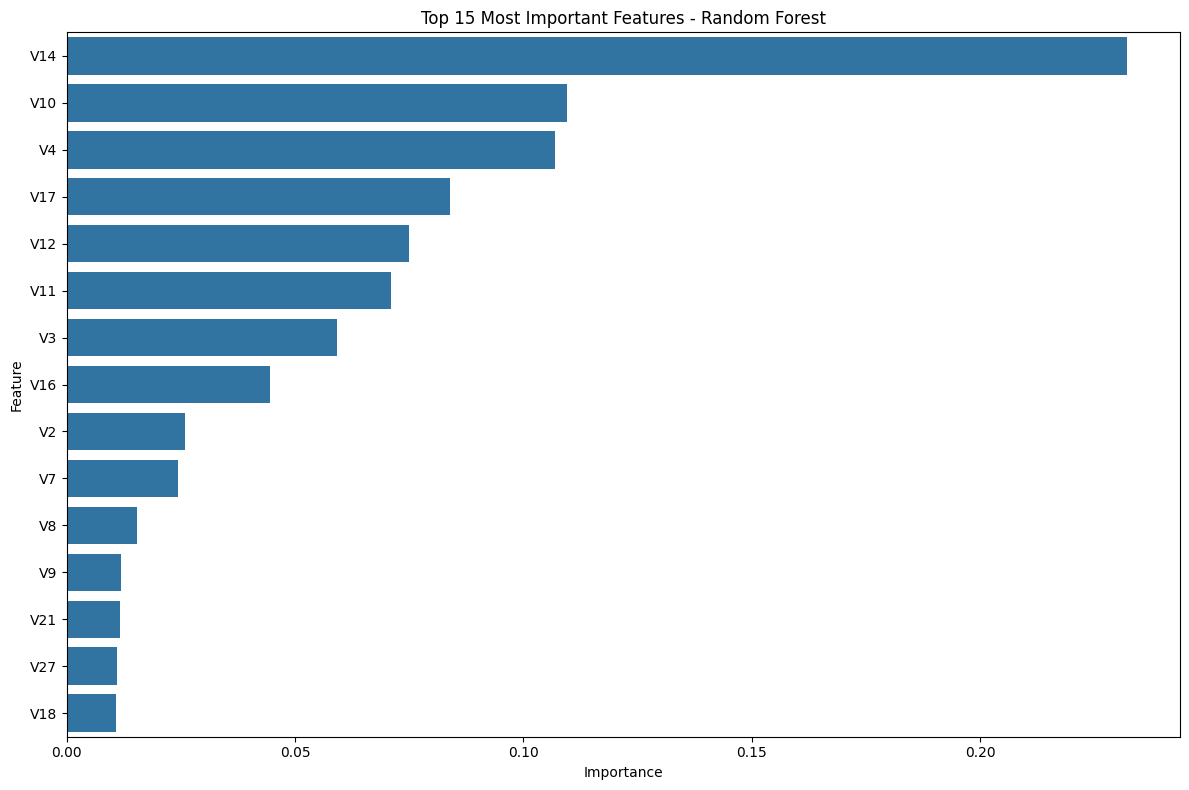


Top 15 Most Important Features:
   Feature  Importance
13     V14    0.232060
9      V10    0.109419
3       V4    0.106941
16     V17    0.084016
11     V12    0.074969
10     V11    0.071095
2       V3    0.059168
15     V16    0.044556
1       V2    0.025819
6       V7    0.024287
7       V8    0.015399
8       V9    0.011981
20     V21    0.011733
26     V27    0.010988
17     V18    0.010792

Optimal Threshold for Random Forest: 0.8000
At this threshold - Precision: 0.9740, Recall: 0.7653, F1: 0.8571

Model performance with optimal threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



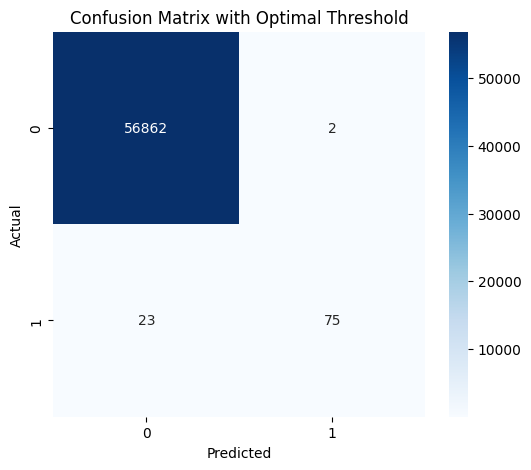

In [ ]:
# Visualize model comparison
plt.figure(figsize=(14, 10))

# Plot for each metric
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i+1)
    bars = plt.bar(models, metrics_comparison[metric], color=colors)
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Feature Importance Analysis for the best model (Random Forest assumed)
# You can change to another model if it performed better
feature_names = X.columns
feature_importance = pd.DataFrame(
    {'Feature': feature_names, 'Importance': rf.feature_importances_}
)
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features - Random Forest')
plt.tight_layout()
plt.show()

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# Optimal Threshold Selection for the best model
# Finding optimal threshold using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_rf)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold for Random Forest: {optimal_threshold:.4f}")
print(f"At this threshold - Precision: {precision[optimal_idx]:.4f}, Recall: {recall[optimal_idx]:.4f}, F1: {f1_scores[optimal_idx]:.4f}")

# Apply the optimal threshold and evaluate again
y_pred_optimal = (y_pred_proba_rf >= optimal_threshold).astype(int)
print("\nModel performance with optimal threshold:")
print(classification_report(y_test, y_pred_optimal))

# Final confusion matrix with optimal threshold
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Optimal Threshold")
plt.show()